# Clustering

Cluster analysis, also known as clustering, is the task of grouping a set of objects so that **objects** in the **same group** (called a cluster) **are more similar** (in some ways) to those in other groups (clusters). It is a primary task of exploratory data analysis and a common statistical data analysis technique used in a variety of fields such as pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics, and **machine learning**.

Clustering is an **unsupervised** machine learning techiniques, meaning that is a type of algorithm that learns patterns from **untagged data**. In other words given {x1, x2, x3, ... xn} and some classes, you are not allowed to know which observation belongs to which class.
The idea behind clustering is dividing observations in subgroups which are homogenous based on a similarity function obtaining a partition (a mathematical object).
<br>

# k-means

K-means is an optimization algorithm used also in clustering which iterates along few simple steps:
- (step 1) select "k", i.e. the number of clusters according to which we want to subgroup data
- (step 2) select two random centroids in data
- (step 3) select a dissimilarity meausure, i.e. distance as Euclidean to assign each of the observation to its respective centroid, then class
- (step 4) recompute centroids based on new class assignment as the **mean** ob the observation (many types of means are available)
- (step 5) if at least one of the observation has changed class then go to step 4 and recompute centroids.

In this notebook we will go through k-means with a toy dataset randomly generated.

<br><br>
Let's import matplotlib and seaborn to visualize data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (14, 10)
sns.set()

The function <span style="font-family: Monaco">make_blobs</span> from scikit-learn makes us able to generate 500 random observations which are then scattered below.


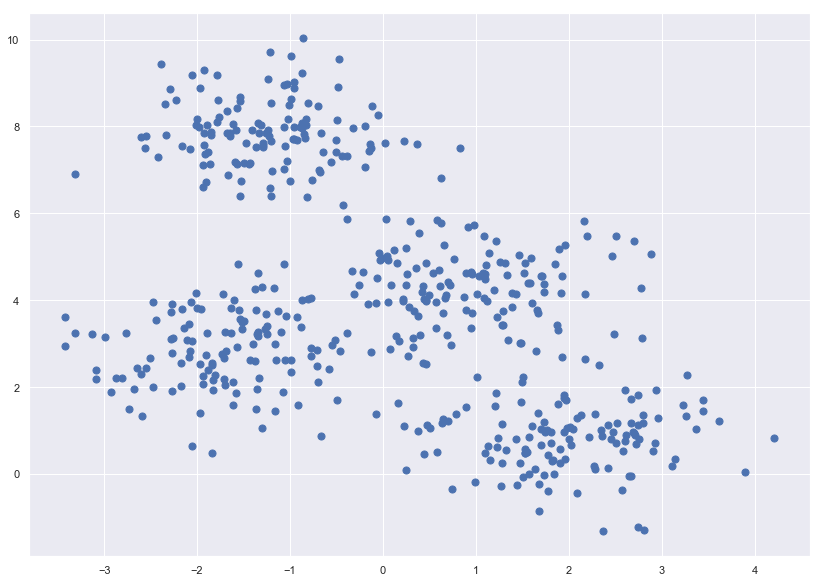

In [ ]:
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=500, centers=4,
                       cluster_std=.8, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50);

At this point we apply a <span style="font-family: Monaco">KMeans</span> algorithm  (from scikit-learn too) assuming 4 classes. Classes are differentiated by colour.


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Let's visualize centroids which are the results of a finite number of iteration of the algorithm (convergence).


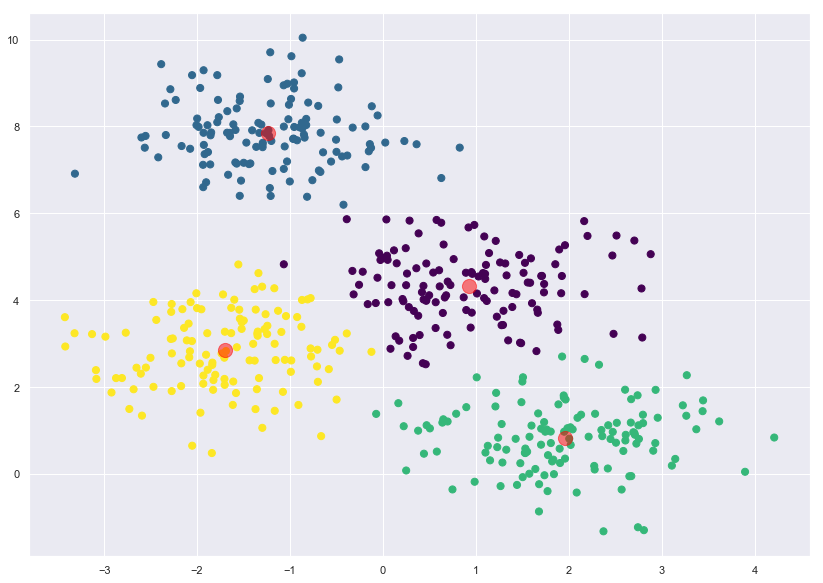

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

## How to determine the number of clusters
In the example above we have assumed 4 clusters (selecting k = 4, in step 1) due to the fact that we have already known since we generated data and we knew how many clusters data have.
In a real life case scenario we are not supposed to know how many clusters data is partitioned. What we can do is to compare the squared sum of distances (SSD) among models with different Ks (i.e. SSD for k = 2, k = 3, 4, 5, ... , n)
<br>

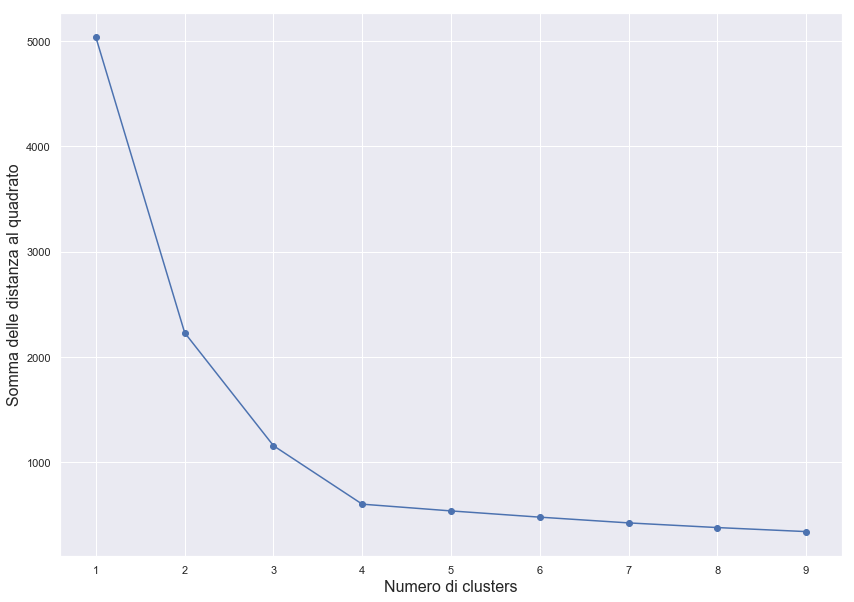

In [ ]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()),marker='o')
plt.xlabel("Numero di clusters", fontsize=16)
plt.ylabel("Somma delle distanza al quadrato", fontsize=16)
plt.savefig("number_of_k.png")
plt.show()


In order to determine the number of **k** we can take advantage of the **elbow method** which tells us the best value considering the amount of variance of the model explained. That means the value of k when the slope starts to flatten. 
</br>
In this case k = 4. 

## References

- Wikipedia Contributors (2021). Cluster analysis. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Cluster_analysis [Accessed 23 Apr. 2021].
- Wikipedia Contributors (2021). Unsupervised learning. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Unsupervised_learning [Accessed 23 Apr. 2021].
- Starmer, J. (2018). StatQuest: K-means clustering. YouTube. Available at: https://www.youtube.com/watch?v=4b5d3muPQmA [Accessed 23 Apr. 2021].

‌

‌

‌